High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object
df min date: 2017-10-01  max date: 2022-08-17


Ada from  2017-10-01  to  2022-08-17
Btc from  2017-10-01  to  2022-08-17


High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object
['nb_Sell:', 1890, 'cost_Sell', 2812641.9640463097]


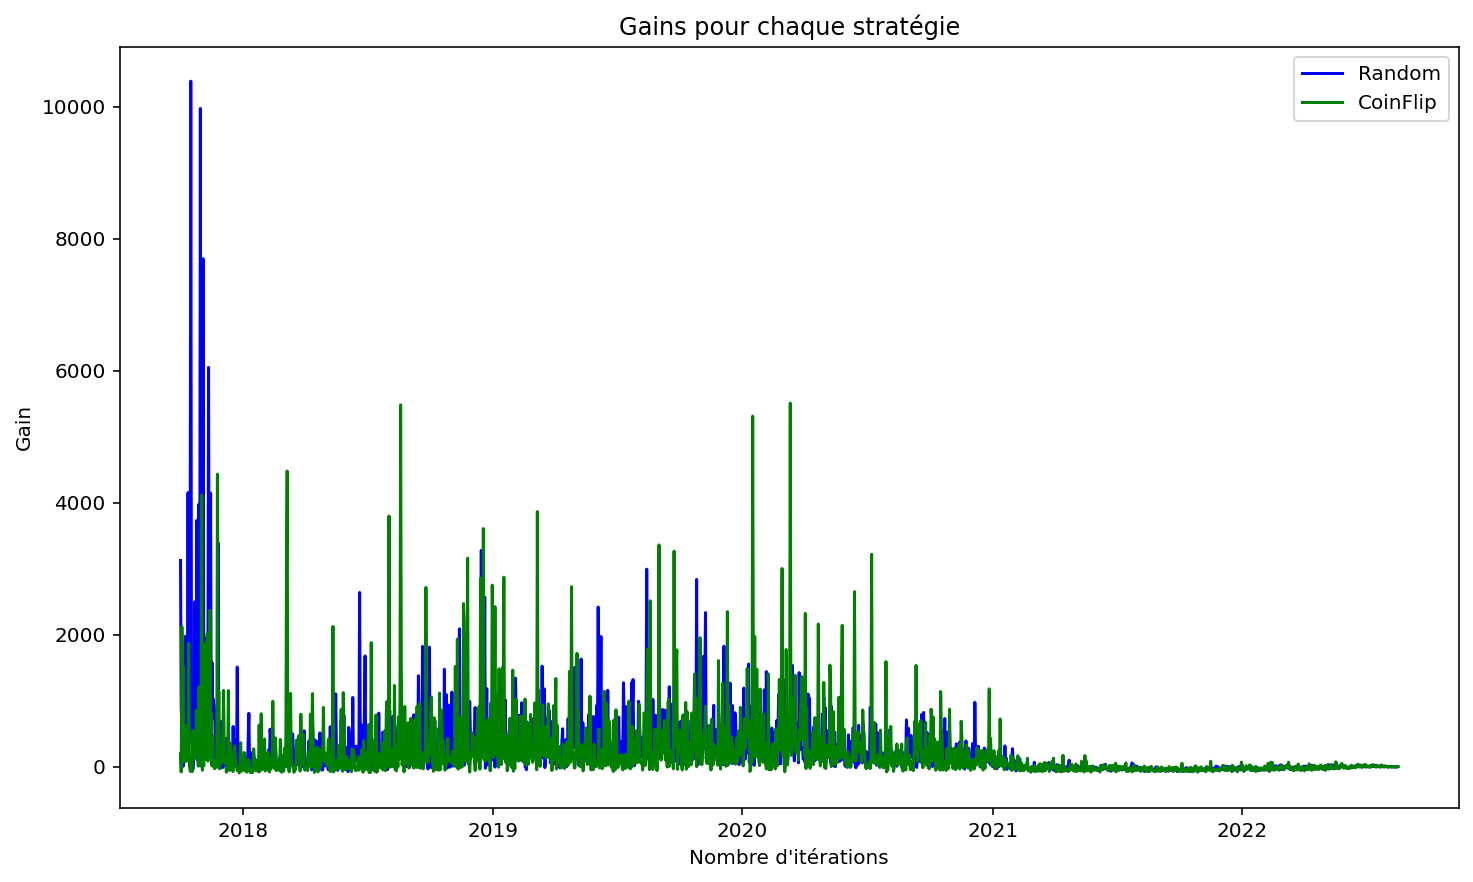

In [1]:
%run -i "BaseClasses-Tests.ipynb"

In [2]:
ada = loader.get(Loader.COINCODEX, Loader.ADA).Close
eth = loader.get(Loader.COINCODEX, Loader.ETH).Close
btc = loader.get(Loader.COINCODEX, Loader.BTC).Close

serie = ada

# Compte rendue stratégies de trading

_Bernier Justine PEIP D_


### _Remarque_

Si vous voulez voir le nombre de transactions et la somme totale de ces transactions : 

Pour les ventes, _NomStrategie_.nb\_and\_cost\_Sell

Pour les achats, _NomStrategie_.nb\_and\_cost\_Buy  

Pour le nombre de fois ou il n'y a pas eu de transaction, _NomStrategie_.nb\_and\_cost\_Still  



## Stratégies



#### StrategyLongterm

La stratégie LongTerm consiste à dépenser tout votre argent à une date décidée, à les garder, puis tout revendre un autre jour. Les paramêtres a spécifiés sont donc la date d'achat et la date de vente.  



##### Tests sur la stratégie



In [3]:
account = Account(100)

strategyLongTerm = StrategyLongTerm(serie.index[0], serie.index[1781])

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyLongTerm)
game.run()

# Test Eval
evalGame = EvalGame(100)

gainLongTerm = evalGame.eval(serie, strategyLongTerm, iteration=10, debug=False)
gainLongTerm

[1885.5711216313466]

In [4]:
# Test EvalTime
gainLongTerm = evalGame.evalTime(serie, strategyLongTerm, iteration=1, debug=False)
gainLongTerm.head()

Date
2017-10-01    1885.571122
2017-10-02       0.000000
2017-10-03       0.000000
2017-10-04       0.000000
2017-10-05       0.000000
dtype: float64

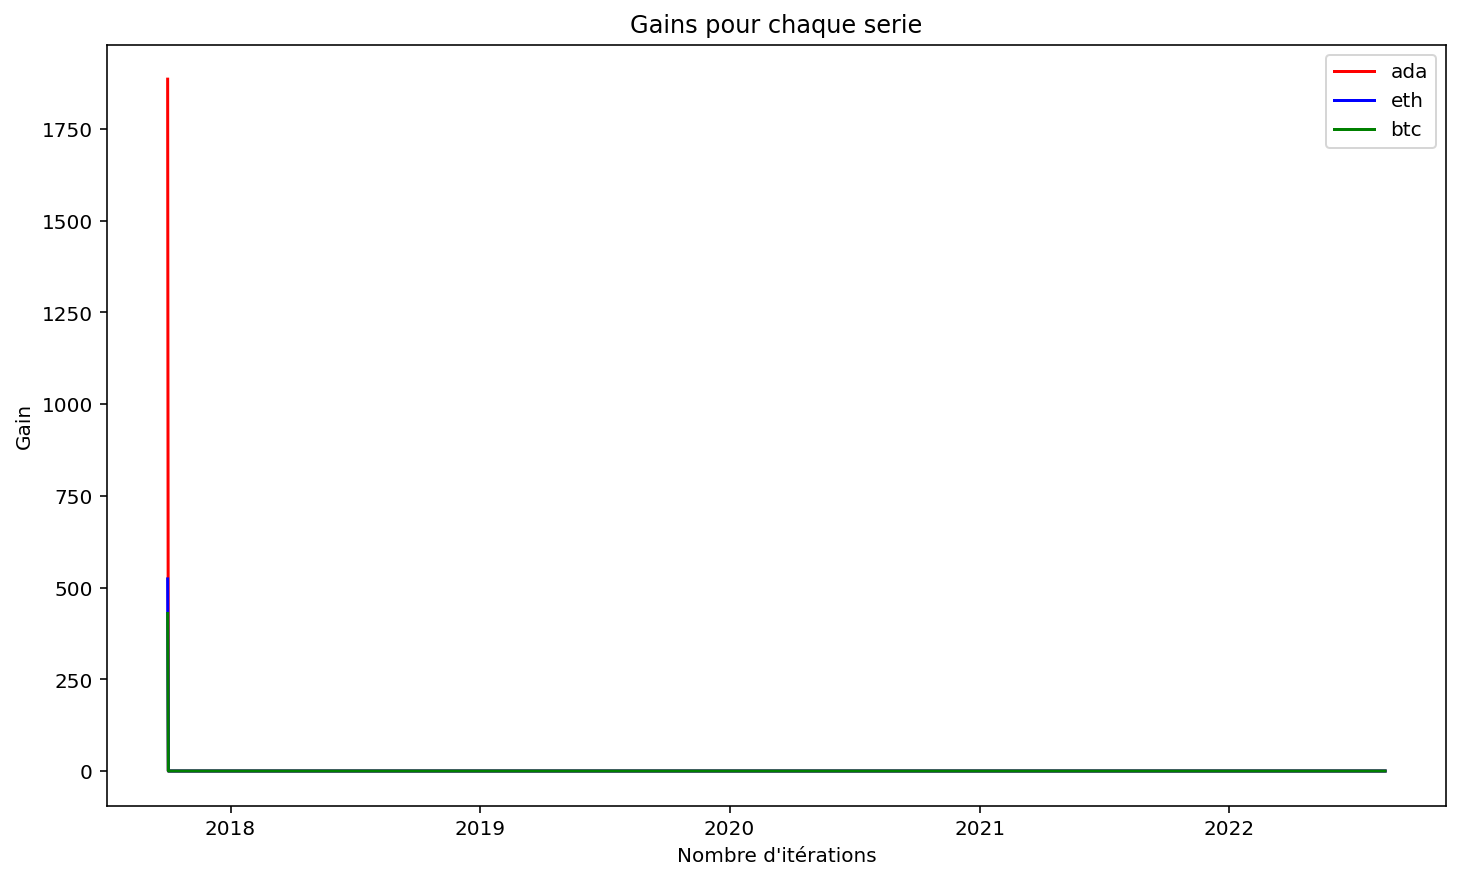

In [5]:
# Test EvalSeries
gain = evalGame.evalSeries([ada, eth, btc], strategyLongTerm, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

#### Stratégie Random

La stratégie Random consiste à choisir au hasard l'action réalisée, le montant d'achat ou de vente \(montant dans les bornes du cash et des valeur mobilières disponibles\).



##### Tests sur la stratégie

In [6]:
strategyRandom = StrategyRandom()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyRandom)
game.run()

# Test Eval
gainRandom = evalGame.eval(serie, strategyRandom, iteration=10, debug=False)
gainRandom

[2789.0353973425636]

In [7]:
# Test EvalTime
gainRandom = evalGame.evalTime(serie, strategyRandom, iteration=1, debug=False)
gainRandom.head()

Date
2017-10-01    602.218581
2017-10-02    464.904645
2017-10-03    663.011334
2017-10-04    871.692425
2017-10-05    237.382579
dtype: float64

In [8]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyRandom, iteration=10, debug=False)

gain

[Date
 2017-10-01      486.911925
 2017-10-02    16819.578930
 2017-10-03      941.948086
 2017-10-04     5730.427726
 2017-10-05     1070.236561
                   ...     
 2022-08-13       -5.721826
 2022-08-14        0.000000
 2022-08-15       -3.209574
 2022-08-16       -0.504738
 2022-08-17        0.000000
 Length: 1782, dtype: float64,
 Date
 2017-10-01     68.059893
 2017-10-02    297.841327
 2017-10-03    225.613915
 2017-10-04    148.944924
 2017-10-05    234.984248
                  ...    
 2022-08-13     -4.486048
 2022-08-14     -0.562636
 2022-08-15     -0.377687
 2022-08-16      0.000000
 2022-08-17      0.000000
 Length: 1782, dtype: float64,
 Date
 2017-10-01     76.934198
 2017-10-02     23.868512
 2017-10-03    262.132420
 2017-10-04    681.541276
 2017-10-05    291.914641
                  ...    
 2022-08-13      0.000000
 2022-08-14      0.000000
 2022-08-15      0.000000
 2022-08-16      0.000000
 2022-08-17      0.000000
 Length: 1782, dtype: float64]

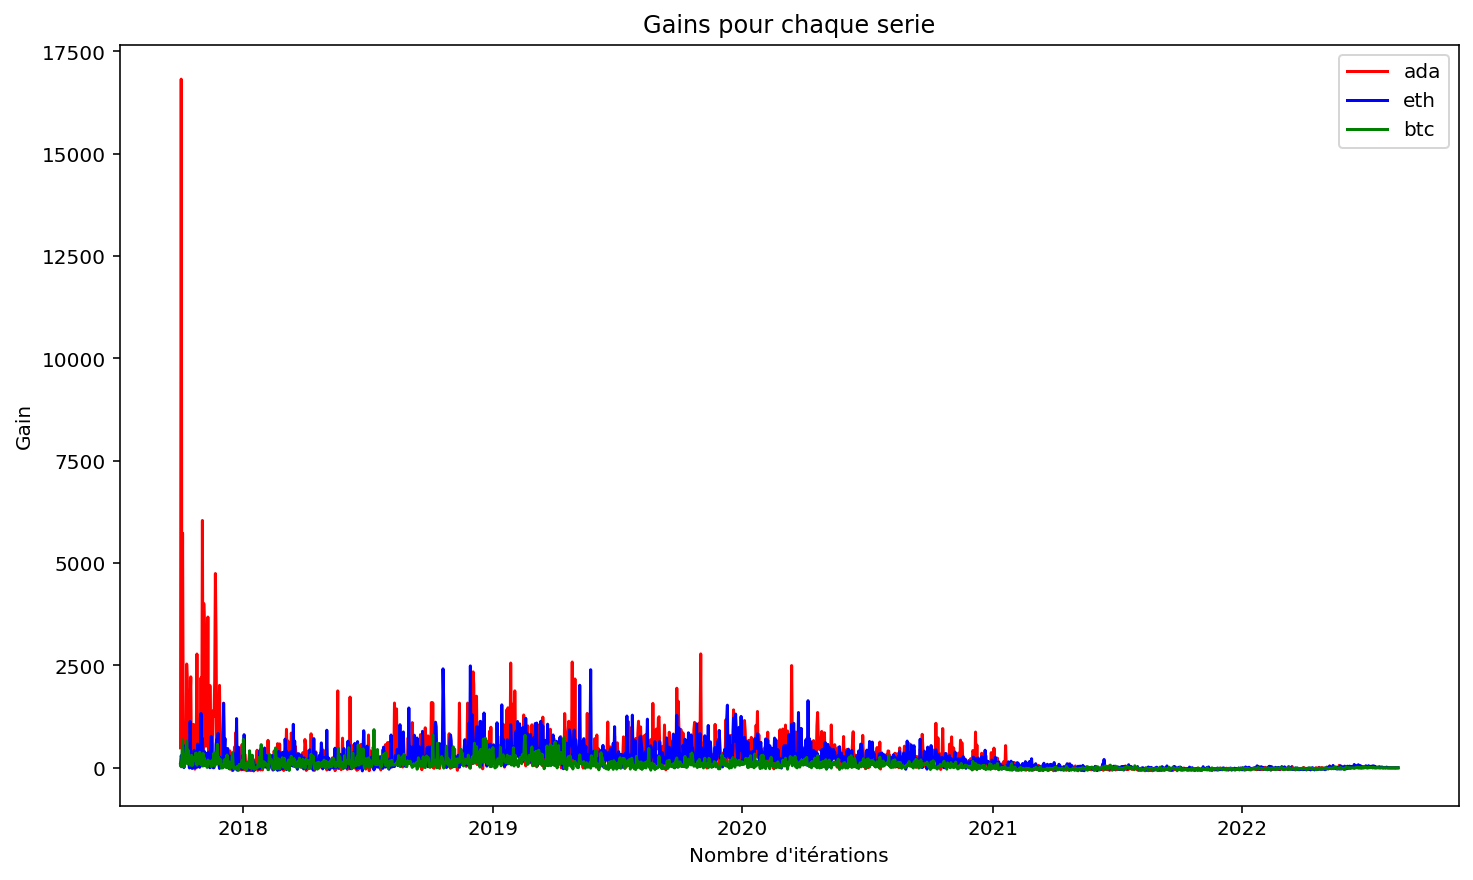

In [9]:
graphicseries(gain)

#### Stratégie Oracle

La stratégie Oracle est la meilleure stratégie possible, et sous entend que l'on puisse déterminer le futur : on vend au plus haut et on rachète quand on est au plus bas. Cela revient à détecter les minimum et maximum locaux.   



##### Tests sur la stratégie

In [10]:
strategyOracle = StrategyOracle()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyOracle)
game.run()

# Test Eval
gainOracle = evalGame.eval(serie, strategyOracle, iteration=10, debug=False)
gainOracle

[3.3299099377116398e+19]

In [11]:
# Test EvalTime
gainOracle = evalGame.evalTime(serie, strategyOracle, iteration=1, debug=False)
gainOracle.head()

Date
2017-10-01    3.329910e+19
2017-10-02    3.329910e+19
2017-10-03    4.475288e+19
2017-10-04    4.475288e+19
2017-10-05    4.475288e+19
dtype: float64

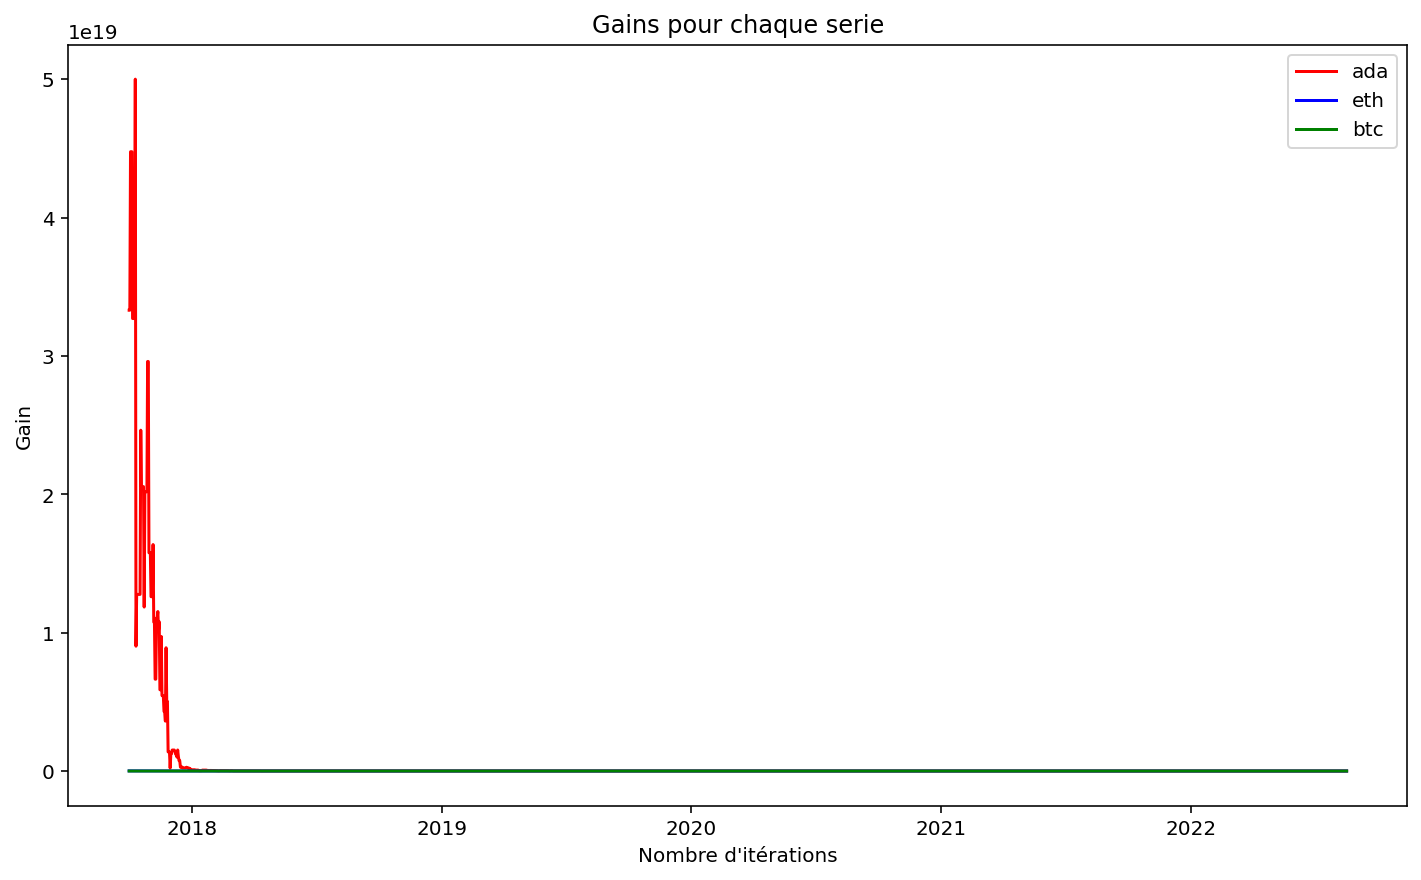

In [12]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyOracle, iteration=10, debug=False)

gain

graphicseries(gain)

#### Stratégie EffetJanvier

La stratégie EffetJanvier permet de profiter d'une tendance d'augmentation du prix des actions pendant le mois de janvier.  



##### Tests sur la stratégie

In [13]:
strategyEffetJanvier = StrategyEffetJanvier()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyEffetJanvier)
game.run()

# Test Eval
gainEffetJanvier = evalGame.eval(serie, strategyEffetJanvier, iteration=10, debug=False)
gainEffetJanvier

[33.16037908192513]

In [14]:
# Test EvalTime
gainEffetJanvier = evalGame.evalTime(serie, strategyEffetJanvier, iteration=1, debug=False)
gainEffetJanvier.head()

Date
2017-10-01    33.160379
2017-10-02    33.160379
2017-10-03    33.160379
2017-10-04    33.160379
2017-10-05    33.160379
dtype: float64

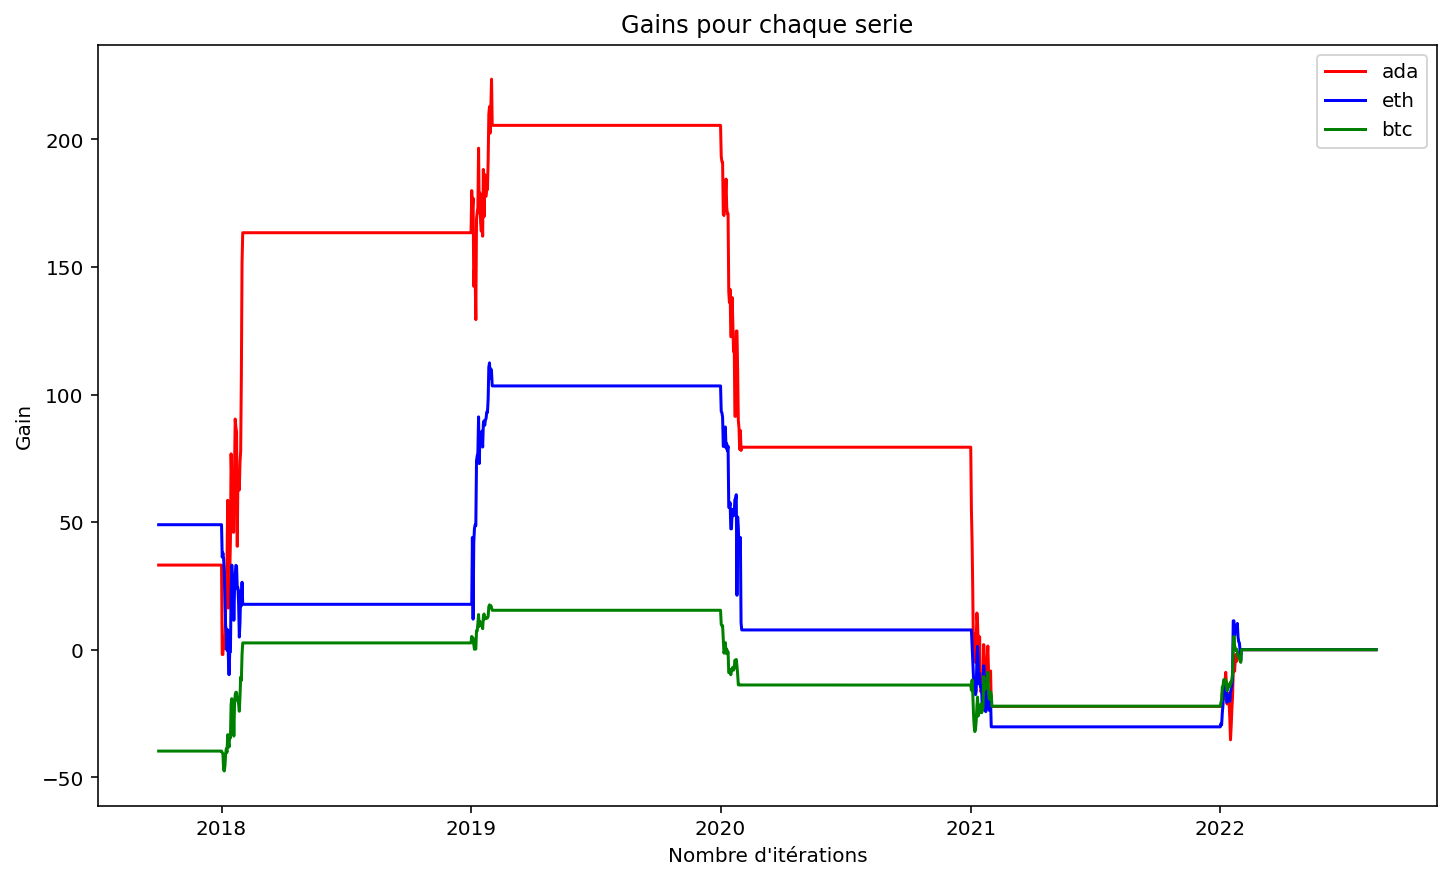

In [15]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyEffetJanvier, iteration=10, debug=False)

gain

graphicseries(gain)

### Stratégie Kinjun\_Sen

La stratégie Kinjun Sen est utilisée pour déterminer les tendances du marché en utilisant la moyenne mobile de 26 périodes et en observant les croisements avec le prix actuel de l'actif.



##### Tests sur la stratégie

In [16]:
strategyKinjun_Sen = StrategyKinjun_Sen()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyKinjun_Sen)
game.run()

# Test Eval
gainKinjun_Sen = evalGame.eval(serie, strategyKinjun_Sen, iteration=10, debug=False)
gainKinjun_Sen

[20650.260850739505]

In [17]:
# Test EvalTime
gainKinjun_Sen = evalGame.evalTime(serie, strategyKinjun_Sen, iteration=1, debug=False)
gainKinjun_Sen.head()

Date
2017-10-01    20650.260851
2017-10-02    20650.260851
2017-10-03    24990.829694
2017-10-04    18205.937284
2017-10-05    22927.480706
dtype: float64

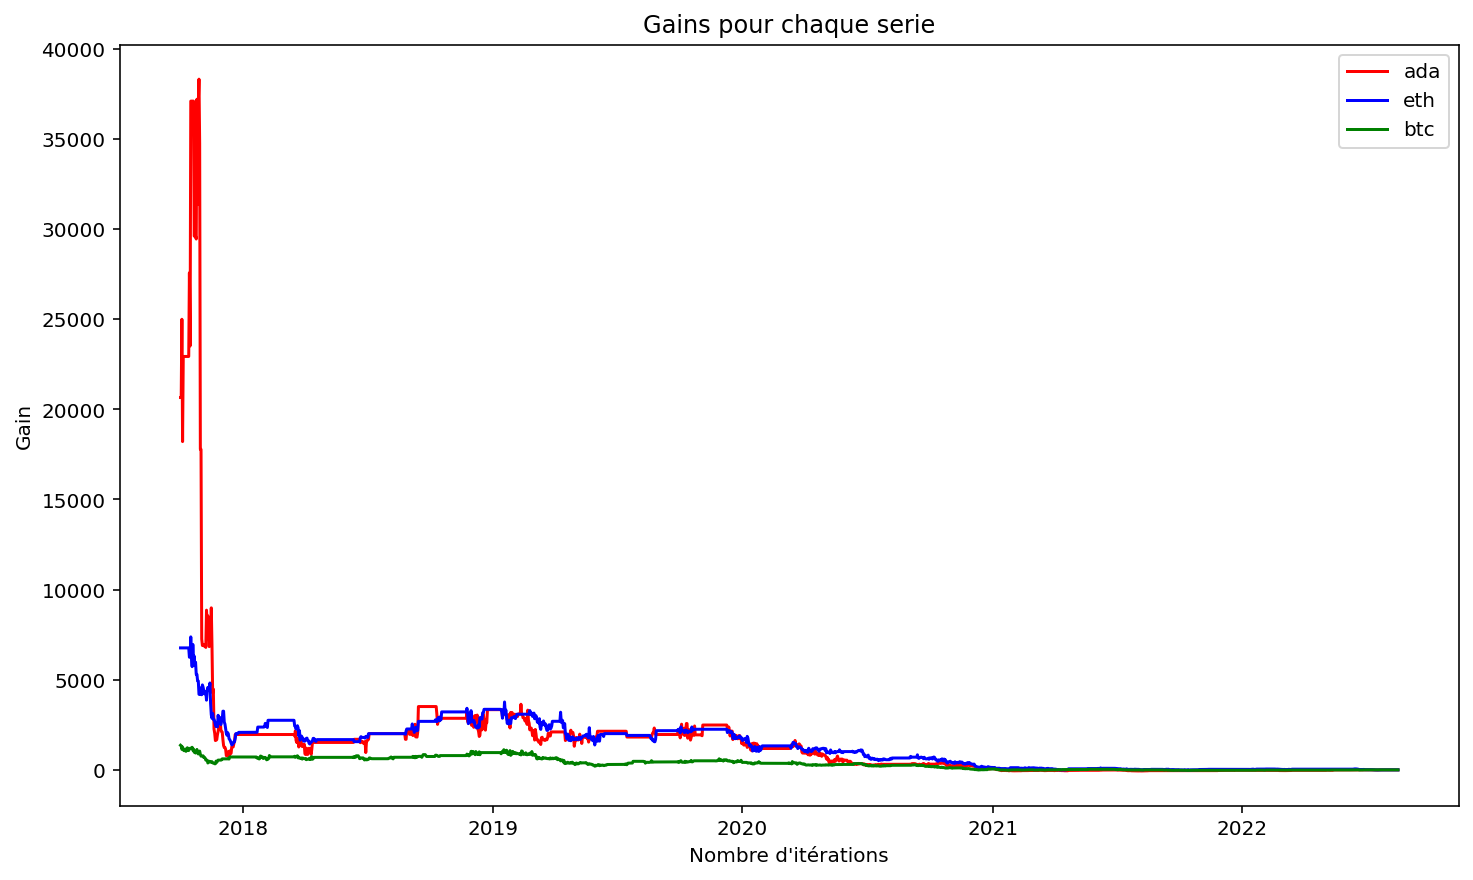

In [18]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyKinjun_Sen, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

### Stratégie DollarSpendOverTime

La stratégie consiste a dépenser un peux d'argent dans le temps, cette argent est définis par une somme que l'utilisateur peux choisir et elle est par défaut a 5, bien sur lors   
de l'execution de la stratégie il sera vérifie que cette somme n'est pas supérieur a l'argent dans le compte.


##### Tests sur la stratégie

In [19]:
strategyDollarSpendOverTime = StrategyDollarSpendOverTime()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyDollarSpendOverTime)
game.run()

# Test Eval
gainDollarSpendOverTime = evalGame.eval(serie, strategyDollarSpendOverTime, iteration=10, debug=False)
gainDollarSpendOverTime

[1981.7763448727565]

In [20]:
# Test EvalTime
gainDollarSpendOverTime = evalGame.evalTime(serie, strategyDollarSpendOverTime, iteration=1, debug=False)
gainDollarSpendOverTime.head()

Date
2017-10-01    1981.776345
2017-10-02    1974.242930
2017-10-03    1950.019431
2017-10-04    1927.256872
2017-10-05    1901.386880
dtype: float64

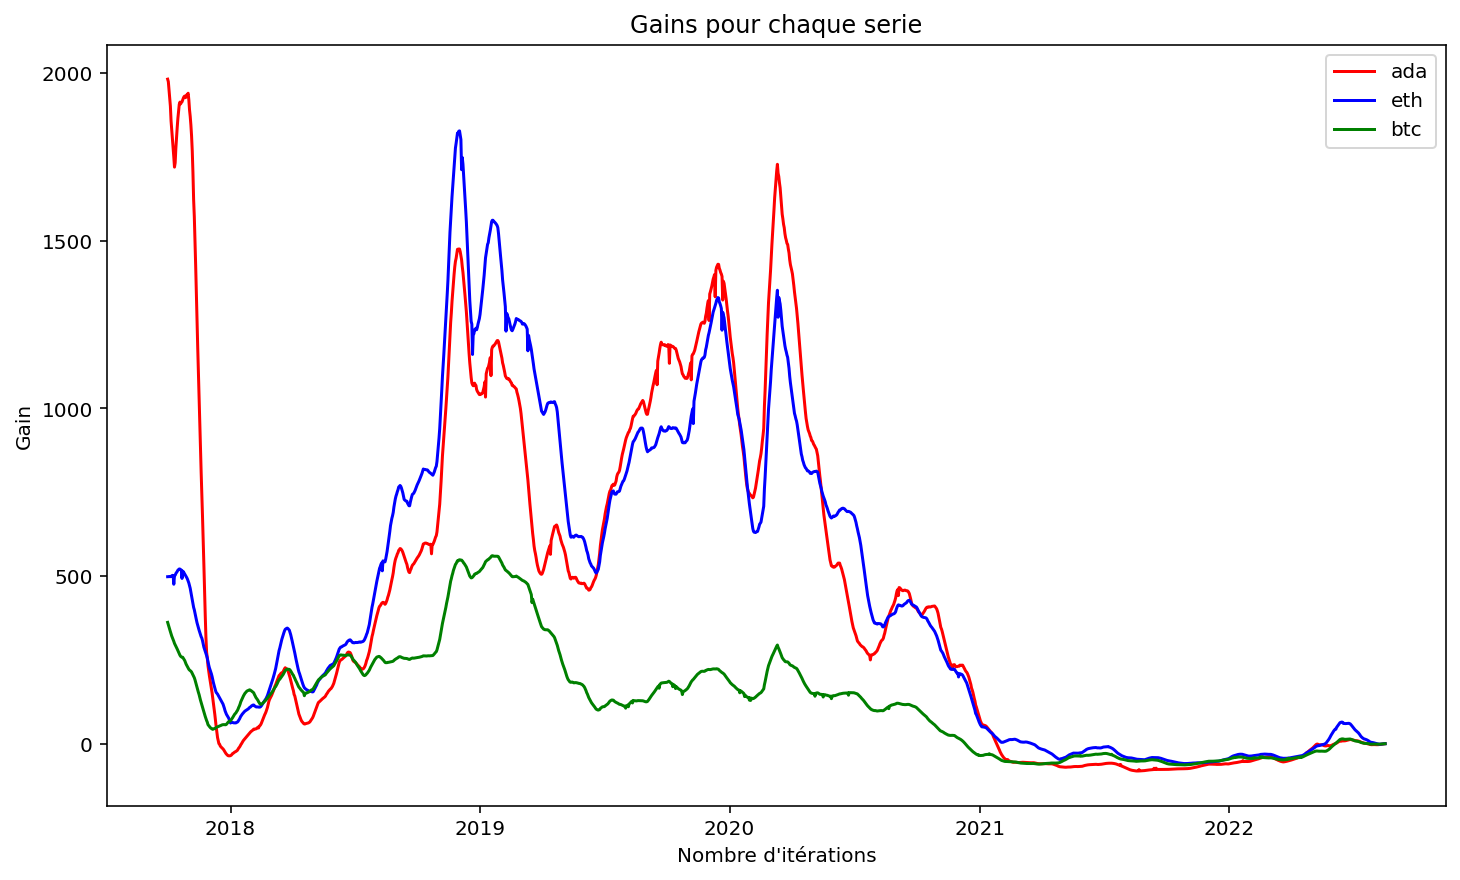

In [21]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyDollarSpendOverTime, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

### Stratégie CoinFlip

Cette stratégie est une dérive de la stratégie Random, ici on reprend le système de pile ou face généré aléatoirement pour réalisé une action.  



##### Tests sur la stratégie

In [22]:
strategyCoinFlip = StrategyCoinFlip()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyCoinFlip)
game.run()

# Test Eval
gainCoinFlip = evalGame.eval(serie, strategyCoinFlip, iteration=10, debug=False)
gainCoinFlip

[1317.0565100858742]

In [23]:
# Test EvalTime
gainCoinFlip = evalGame.evalTime(serie, strategyCoinFlip, iteration=1, debug=False)
gainCoinFlip.head()

Date
2017-10-01    6357.569750
2017-10-02    1252.729657
2017-10-03     409.234431
2017-10-04     -12.418134
2017-10-05      88.346873
dtype: float64

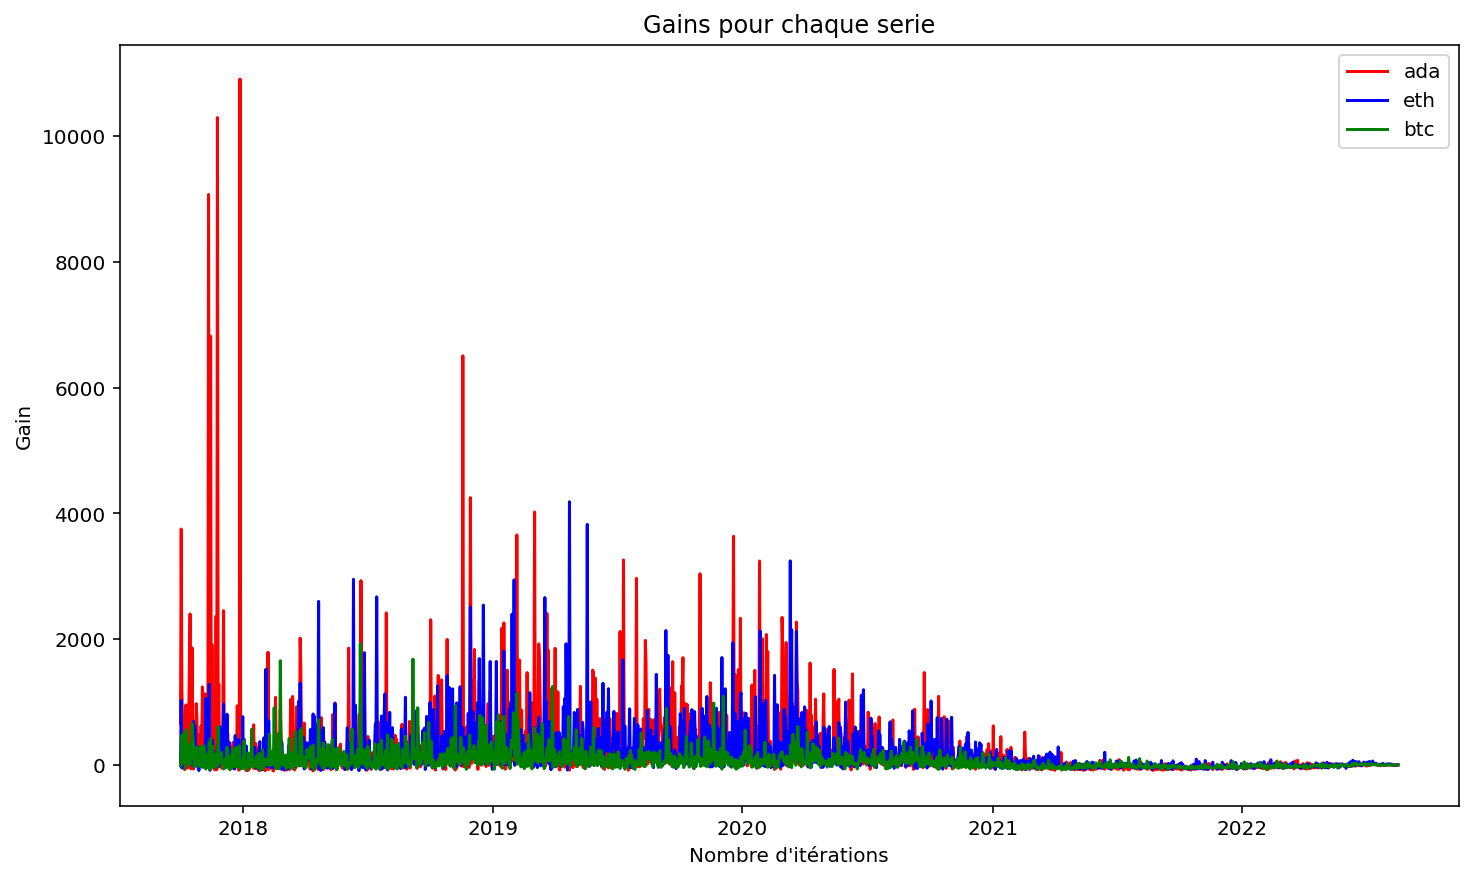

In [24]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyCoinFlip, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

### Stratégie Veille

La stratégie Veille est une stratégie qui réalise une des trois actions en fonction de la valeur des cours de la veille. Ainsi, elle va comparé la valeur des cours d'aujourd'hui et celle d'hier.  



##### Tests sur la stratégie

In [25]:
strategyVeille = StrategyVeille()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyVeille)
game.run()

# Test Eval
gainVeille = evalGame.eval(serie, strategyVeille, iteration=10, debug=False)
gainVeille

[147.88194908452226]

In [26]:
# Test EvalTime
gainVeille = evalGame.evalTime(serie, strategyVeille, iteration=1, debug=False)
gainVeille.head()

Date
2017-10-01    147.881949
2017-10-02    147.881949
2017-10-03    303.478945
2017-10-04    303.478945
2017-10-05    303.478945
dtype: float64

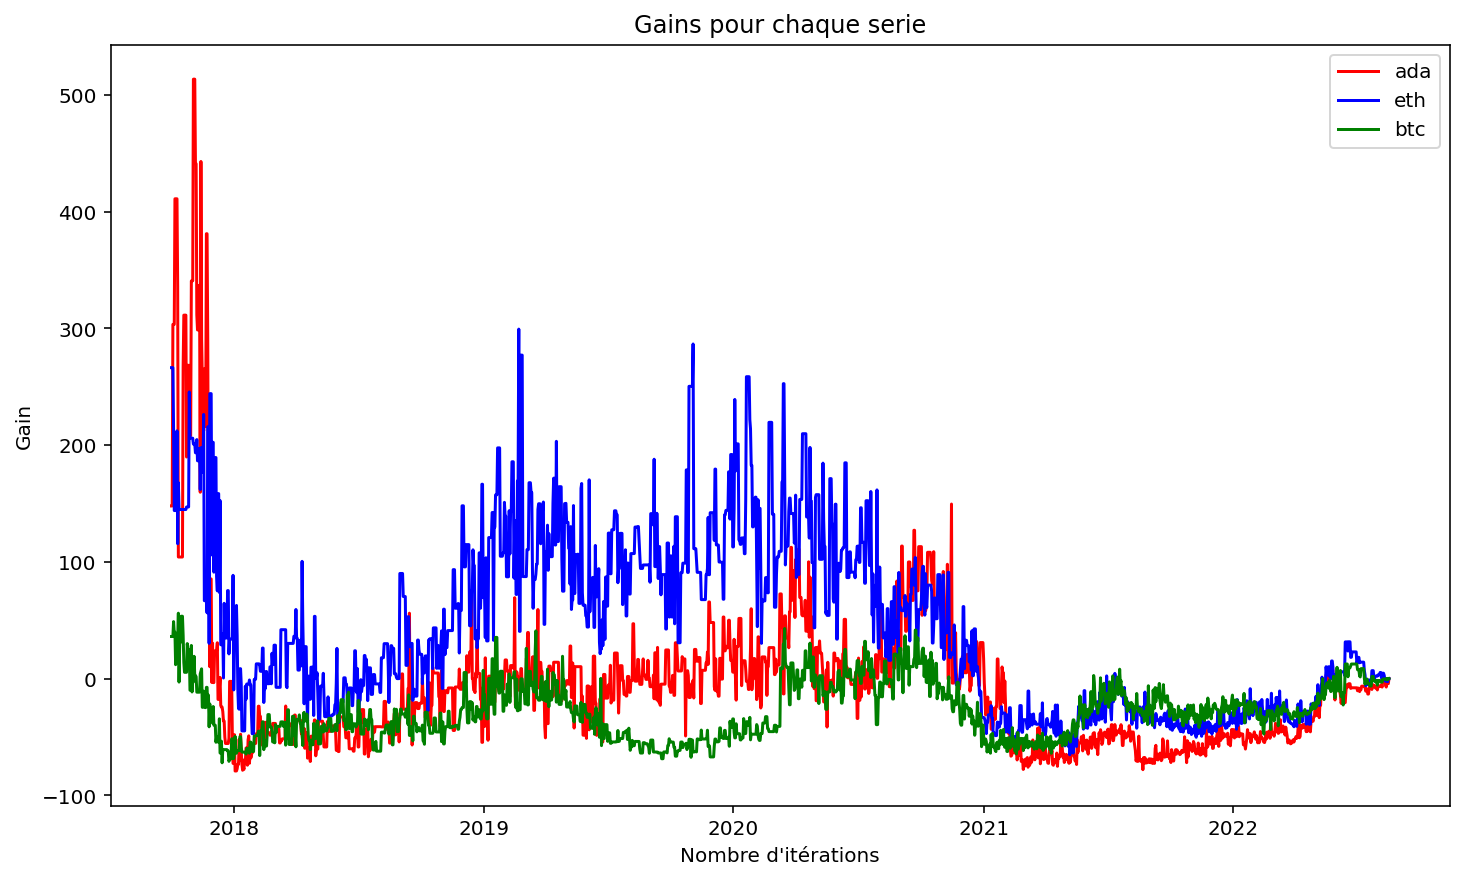

In [27]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyVeille, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

### Stratégie InvestmentThreshold

La stratégie InvestmentThreshold reprend l'un des conseils d'investissement évoqué dans le livre 'The Intelligent Investor' de Benjamin Graham, Jason Zweig, Harper Business : Les investisseurs doivent être prêts à vendre des actions si elles ne répondent plus à leurs critères d'investissement ou si une meilleure opportunité d'investissement se présente.

Ainsi, cette stratégie consiste a réalisé les actions en fonction d'un critère d'investissement caractérisé par un seuil que l'investisseur doit définir. Ce seuil est comparé a la moyenne mobile des 30 dernier jours qui est une tendance des cours et au prix actuel.

Si le seuil \(critère d'investissement\) est supérieur a l'observation du jour et a la tendance alors on estime que cette tendance va augmenté, donc qu'il y a opportunité d'investissement, on achète.

À l'inverse, si il est inférieur au prix du jours et a la tendance, on vends.

Sinon, on ne fait rien.



##### Tests sur la stratégie

In [28]:
strategyInvestmentThreshold = StrategyInvestmentThreshold(12.0)

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyInvestmentThreshold)
game.run()

# Test Eval
gainInvestmentThreshold = evalGame.eval(serie, strategyInvestmentThreshold, iteration=10, debug=False)
gainInvestmentThreshold

[2093.7716685479945]

In [29]:
# Test EvalTime
gainInvestmentThreshold = evalGame.evalTime(serie, strategyInvestmentThreshold, iteration=1, debug=False)
gainInvestmentThreshold.head()

Date
2017-10-01    2093.771669
2017-10-02    2287.535090
2017-10-03    2150.054115
2017-10-04    2233.450347
2017-10-05    2233.450347
dtype: float64

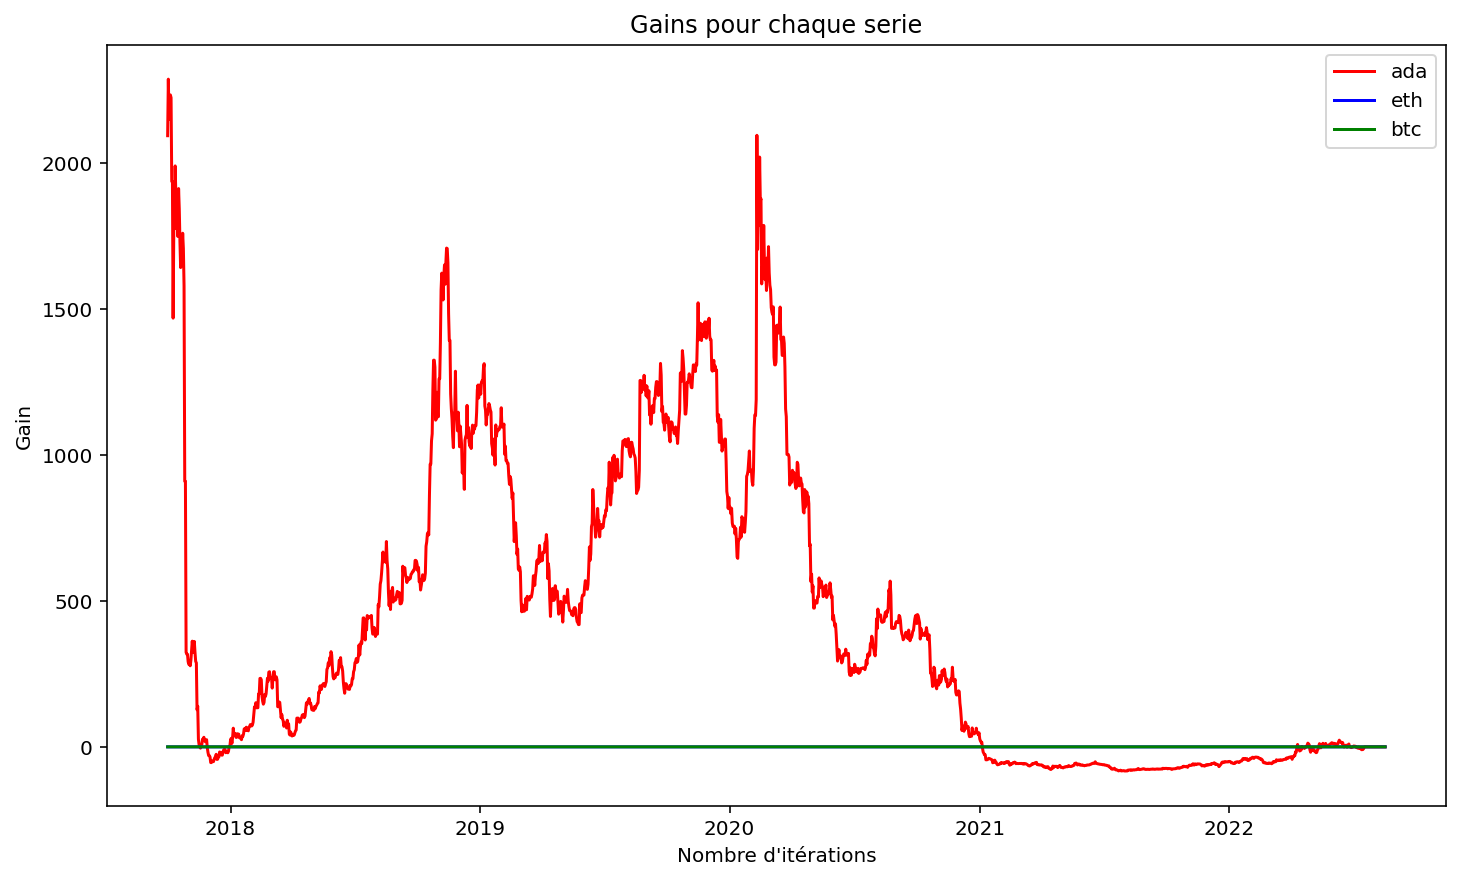

In [30]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyInvestmentThreshold, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

### Stratégie IntrinsicPrice

La stratégie IntrinsicPrice reprend aussi une idée évoqué dans le livre 'The Intelligent Investor' : L'investissement en valeur.

La stratégie consiste à acheter des actions sous\-évaluées par le marché, basées sur des mesures financières telles que le ratio cours/bénéfices, ou d'autres mesures qui permette de mesurer la valeur fondamentale de la cryptomonnaie et de vendre des actions si elles sont surévalué.  

Dans le livre il est recommandé  d'acheter des actions à un prix inférieur à leur valeur intrinsèque, ce que Benjamin Graham appelle "marge de sécurité". Ainsi, la stratégie a une marge de sécurité qui est en dessous de la valeur intrinsèque, afin de minimiser les risques et maximiser les gains.

Il y a une marge de sécurité qui est définis par l'utilisateur au préalable en parramêtre ou qui est par défaut a 0.1. Ainsi, si l'utilisateur ne définis pas la marge de sécurité, la valeur intrinsèque avec marge serait de 0.9 \* valeur  
 intrinsèque (ratio).

Donc le prix du jour est comparer a la valeur intrinsèque avec une marge de sécurité.

Si le prix du jour est inférieur a la valeur intrinsèque alors on estime que le prix du marché est sous\-évalué, on achète.

À l'inverse, si le prix du jour est supérieur a la valeur intrinsèque, on estime que le prix du marché est surévalué, on vends.

Sinon, on ne fait rien.

##### Tests sur la stratégie

In [31]:
strategyIntrinsicPrice = StrategyIntrinsicPrice()

# Test Game simple
game = Game(serie)
game.setAccount(account)
game.setStrategy(strategyIntrinsicPrice)
game.run()

# Test Eval
gainIntrinsicPrice = evalGame.eval(serie, strategyIntrinsicPrice, iteration=10, debug=False)
gainIntrinsicPrice

[4499.717119027902]

In [32]:
# Test EvalTime
gainIntrinsicPrice = evalGame.evalTime(serie, strategyIntrinsicPrice, iteration=1, debug=False)
gainIntrinsicPrice.head()

Date
2017-10-01    4499.717119
2017-10-02    4905.984070
2017-10-03    4617.725450
2017-10-04    4792.583700
2017-10-05    4792.583700
dtype: float64

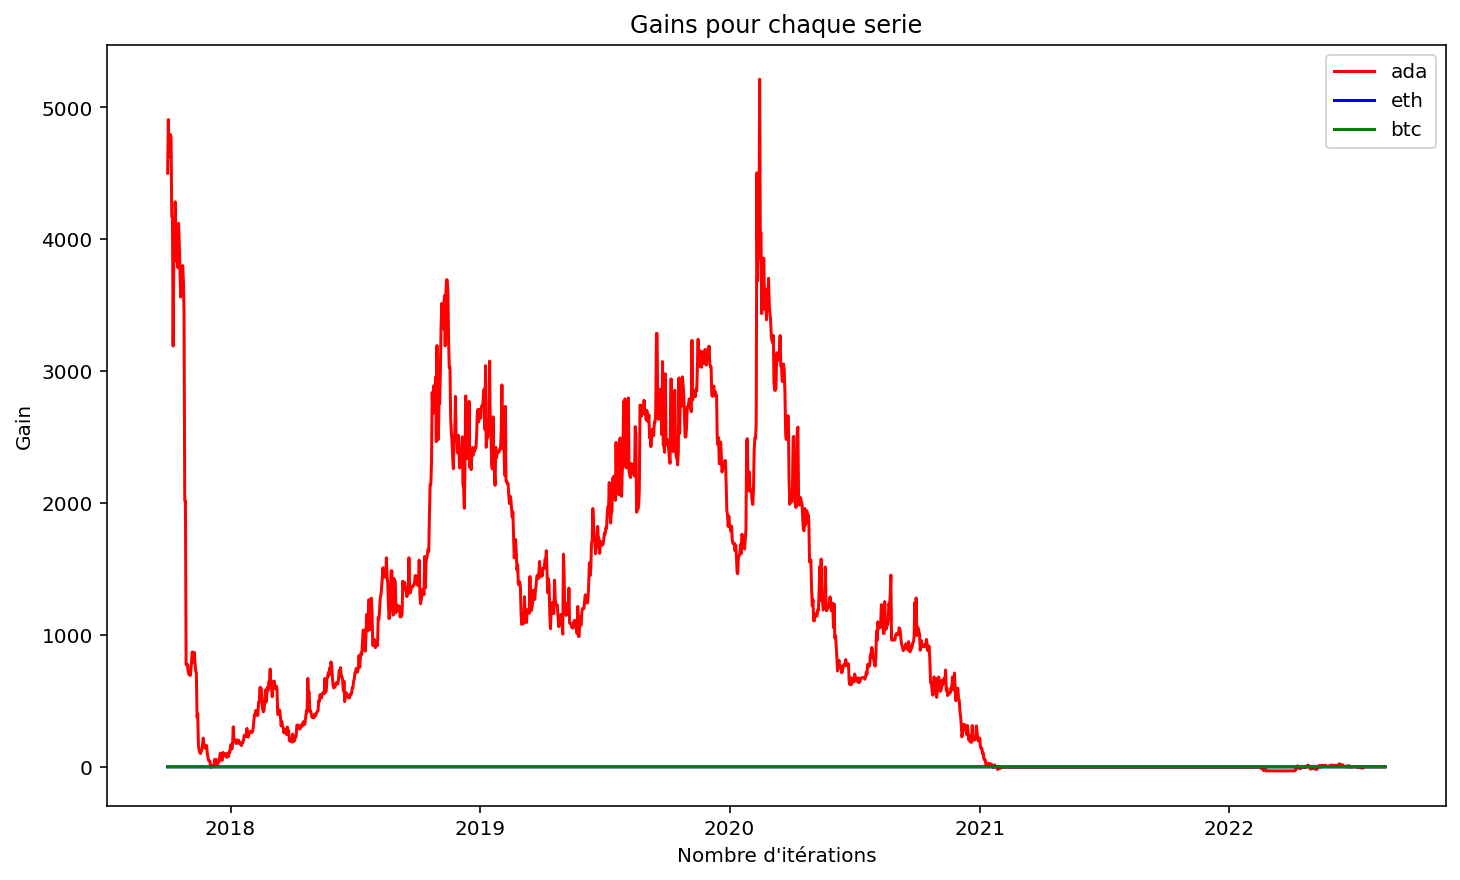

In [33]:
# Test EvalSeries
evalGame = EvalGame(100)

gain = evalGame.evalSeries([ada, eth, btc], strategyIntrinsicPrice, iteration=10, debug=False)

gain

# Graphique EvalSeries
graphicseries(gain)

#### Test toutes les stratégies sur une série



In [34]:
strats_serie

,LongTerm,Random,Oracle,EffetJanvier,Kinjun_Sen,Veille,InvestmentThreshold,DollarSpendOverTime,CoinFlip,IntrinsicPrice
Date,,,,,,,,,,
2017-10-01,1885.571122,3123.202017,3.329910e+19,33.160379,20650.260851,147.881949,2093.771669,1981.776345,193.279385,4499.717119
2017-10-02,0.000000,882.413839,3.329910e+19,33.160379,20650.260851,147.881949,2287.535090,1974.242930,-81.728737,4905.984070
2017-10-03,0.000000,621.744438,4.475288e+19,33.160379,24990.829694,303.478945,2150.054115,1950.019431,2118.787873,4617.725450
2017-10-04,0.000000,117.692311,4.475288e+19,33.160379,18205.937284,303.478945,2233.450347,1927.256872,1372.690563,4792.583700
2017-10-05,0.000000,5.414559,4.475288e+19,33.160379,22927.480706,303.478945,2233.450347,1901.386880,1512.311872,4792.583700


#### Graphiques de toutes les stratégies sur une série



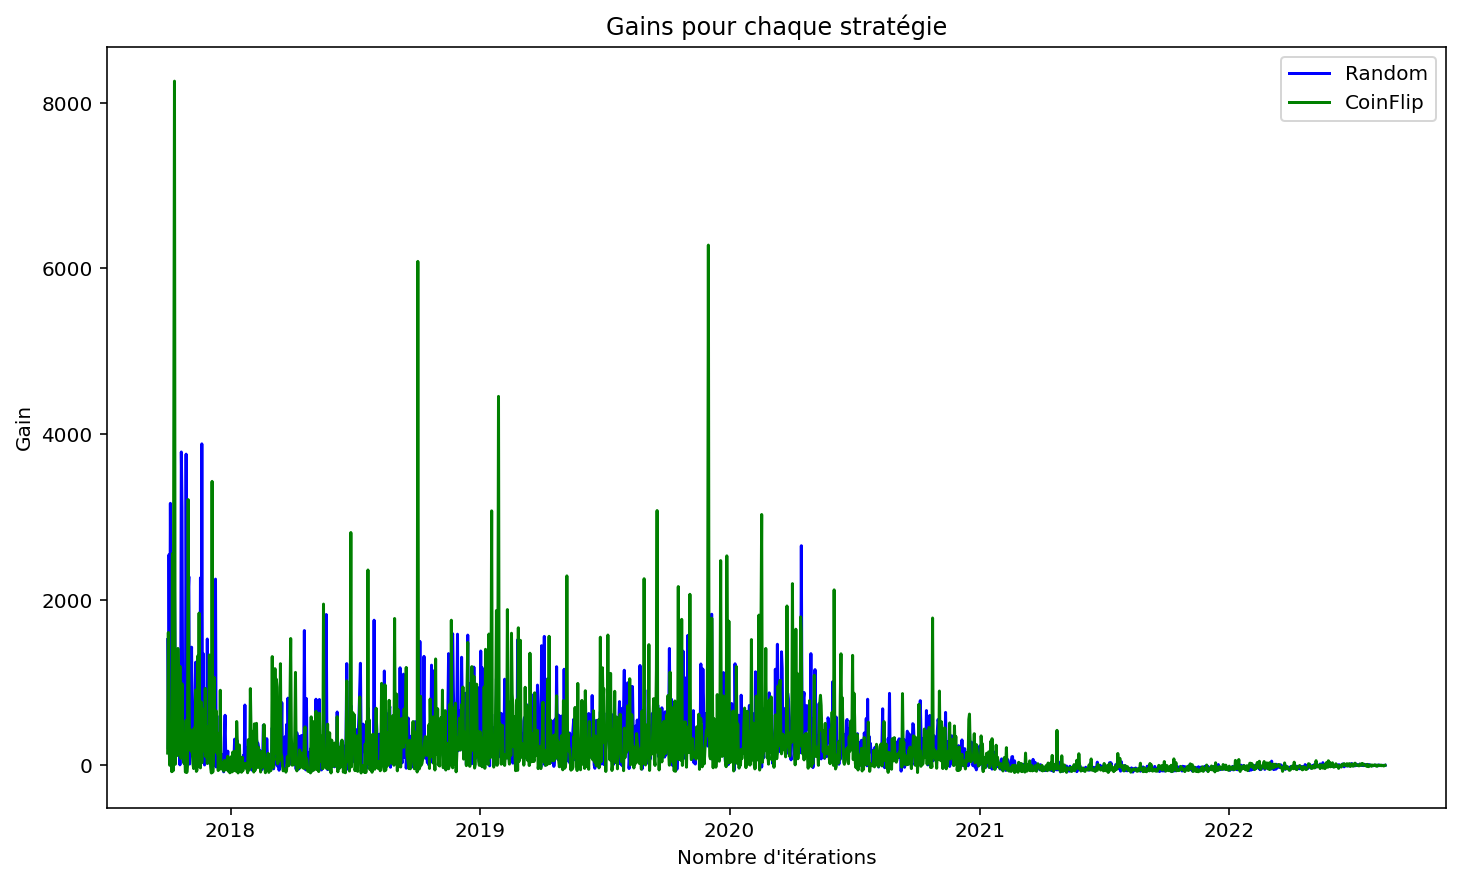

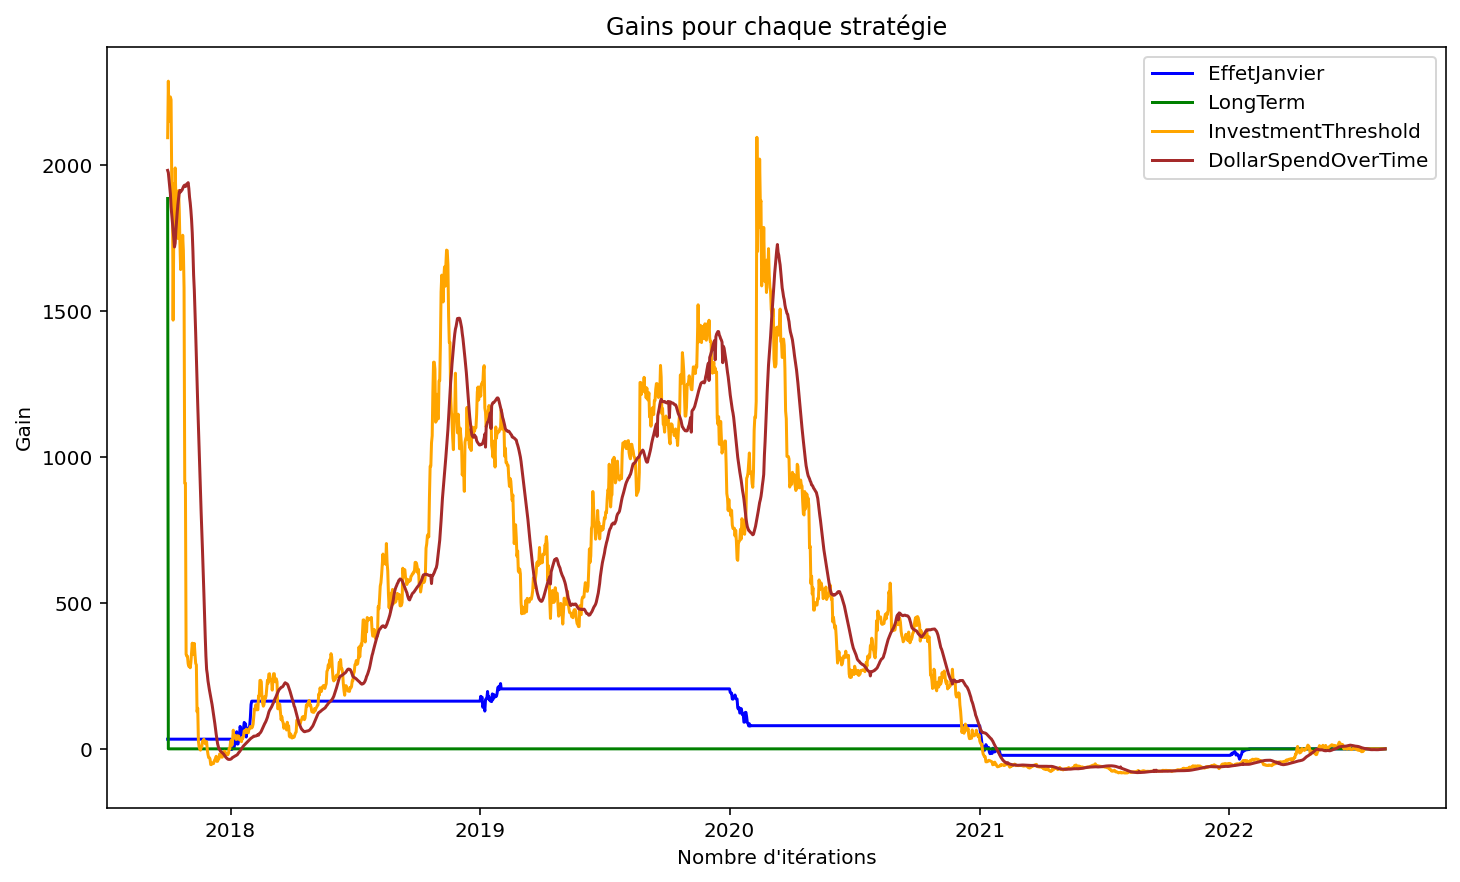

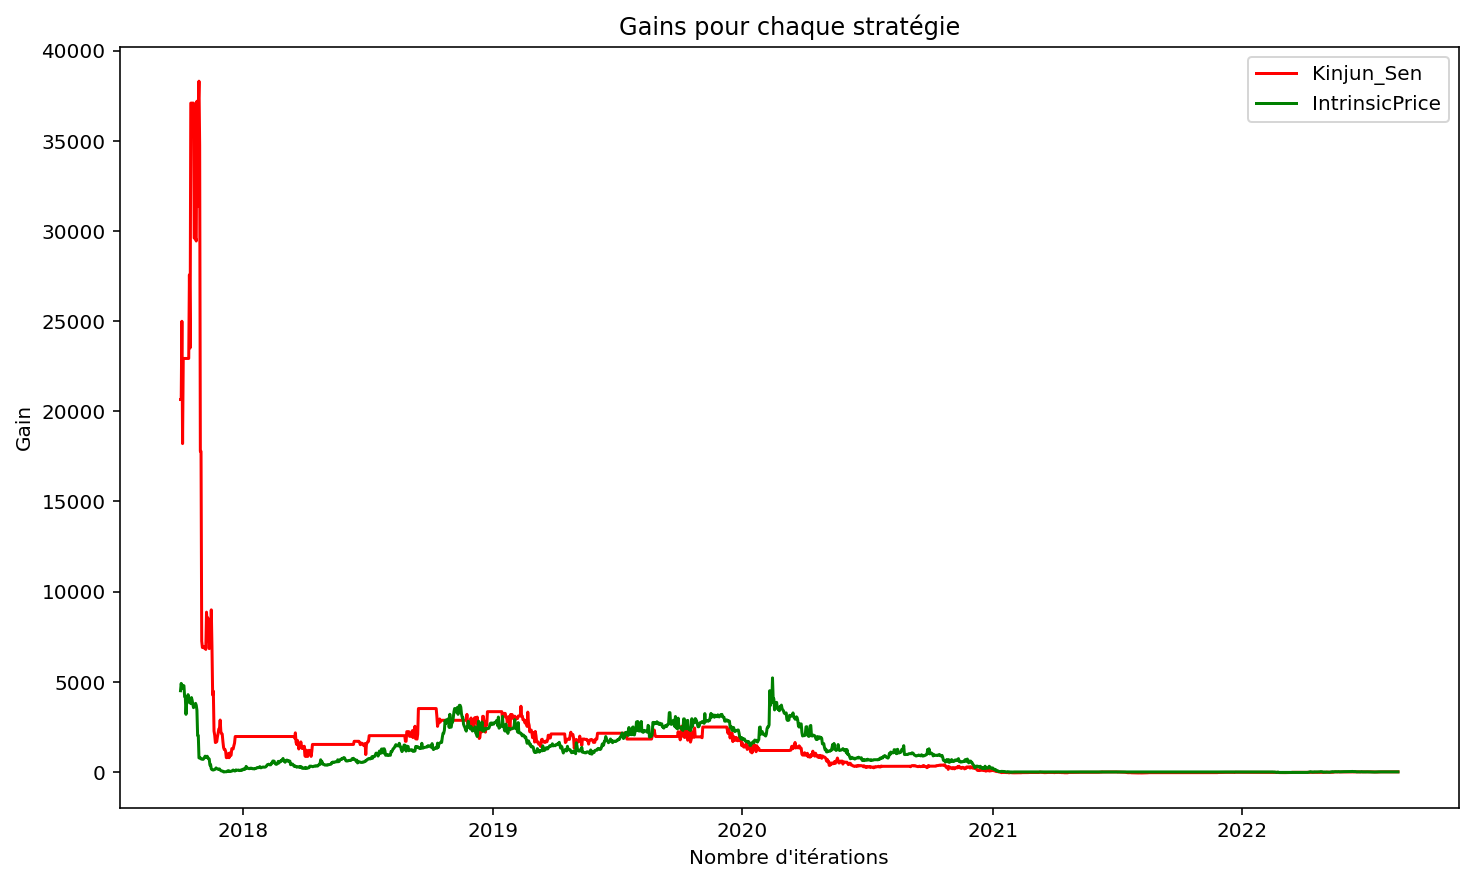

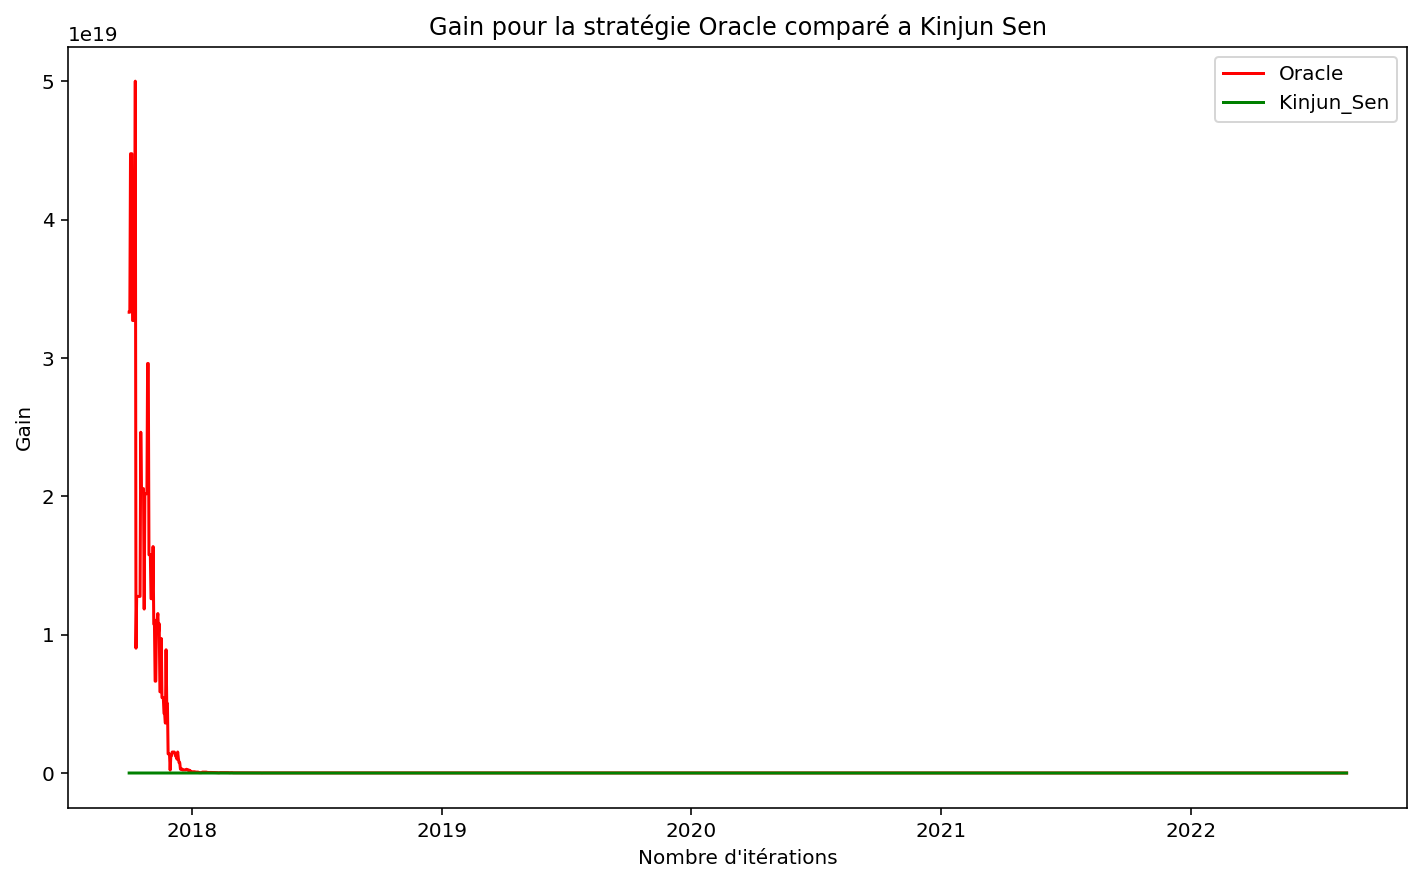

In [36]:
gain = evalGame.evalStrategies(serie, [strategyLongTerm, strategyRandom, strategyOracle, strategyEffetJanvier, strategyKinjun_Sen, strategyVeille, strategyInvestmentThreshold, strategyDollarSpendOverTime, strategyCoinFlip, strategyIntrinsicPrice], iteration=10, debug=False)

# graphics des stratégies ayant un gain aléatoires
graphicrandomgains()

# graphic des stratégies ayant un petit gain
graphiclittlegains()

# graphic des stratégies ayant un gain plus importants (>3000)
graphicmiddlegains()

# graphic de la stratégie Oracle comparé a la stratégie Kinjun Sen
graphicbiggains()

### Bilan

Sur les graphiques, nous pouvons observer les gains obtenues pour chaque stratégie et aussi pour chacune, observer le comportement sur différentes séries de cryptomonnaie.

Celle qui donne le plus de gains est sans surprise la stratégie Oracle qui sait comment agir en fonction du prix du marché du jour d'après. Si on l'exclut, la stratégie Kinjun Sen ressort, avec un gains pour différentes séries plus intéressantes que les autres.

D'autres stratégies permettent aussi d'assurer d'assurer un gain et de minimiser les risques comme la stratégie DollarSpendOverTime, la stratégie InvestmentThreshold et la stratégie IntrinsicPrice. 

La stratégie Veille reprend le même principe que la stratégie Oracle, mais en analysant le prix de la veille, ce qui laisse toujours l'incertitude sur le prix du marché du lendemain. C'est pourquoi elle n'est pas très intéressante.

La stratégie LongTerm ne profite d'aucune analyse, pareils pour la stratégie Effetjanvier qui ne s'appuie que sur un phénomène dû au fêtes de fin d'année.

Ainsi, la meilleur stratégie reste Kinjun Sen suivi par Intrisicprice et InvestmentThreshold.  

